<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/ExampleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [89]:
cCitra = os.listdir('/content/drive/My Drive/Dataset/ContohCitra/CITRA/')
print(cCitra)
print(len(cCitra))

['C102P63ThinF_IMG_20150918_161508_cell_113.png', 'C102P63ThinF_IMG_20150918_161508_cell_14.png', 'C102P63ThinF_IMG_20150918_161508_cell_133.png', 'C102P63ThinF_IMG_20150918_161508_cell_101.png', 'C102P63ThinF_IMG_20150918_161508_cell_37.png', 'C102P63ThinF_IMG_20150918_161508_cell_71.png', 'C102P63ThinF_IMG_20150918_161508_cell_143.png', 'C102P63ThinF_IMG_20150918_161508_cell_172.png', 'C102P63ThinF_IMG_20150918_161508_cell_150.png', 'C102P63ThinF_IMG_20150918_161508_cell_175.png', 'C102P63ThinF_IMG_20150918_162155_cell_51.png', 'C102P63ThinF_IMG_20150918_162155_cell_117.png', 'C102P63ThinF_IMG_20150918_162155_cell_32.png', 'C102P63ThinF_IMG_20150918_162155_cell_119.png', 'C102P63ThinF_IMG_20150918_162155_cell_116.png', 'C102P63ThinF_IMG_20150918_162051_cell_65.png', 'C102P63ThinF_IMG_20150918_162051_cell_79.png', 'C102P63ThinF_IMG_20150918_162051_cell_9.png', 'C102P63ThinF_IMG_20150918_162051_cell_100.png', 'C102P63ThinF_IMG_20150918_162051_cell_32.png', 'C102P63ThinF_IMG_20150918_16

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(cCitra)):
    img = cv2.imread('/content/drive/My Drive/Dataset/ContohCitra/CITRA'+ "/" + cCitra[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/Example.csv", x, fmt='%s',delimiter=',' )

In [92]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/Example.csv')
print (len(dataset))
print (dataset)

1000
           H1        H2            H3  ...            H6            H7  Actual
0    0.012576  0.000001  3.522445e-09  ... -6.316204e-12  2.131252e-17     1.0
1    0.020236  0.000030  8.205821e-07  ...  2.039957e-10 -6.929154e-15     1.0
2    0.016640  0.000008  2.609739e-09  ...  8.017982e-11  1.235930e-15     1.0
3    0.017108  0.000012  2.610560e-08  ...  9.565258e-11 -3.932178e-16     1.0
4    0.016468  0.000002  5.677155e-09  ... -4.457857e-11 -2.384089e-16     1.0
..        ...       ...           ...  ...           ...           ...     ...
995  0.027486  0.000007  5.632307e-07  ...  5.037804e-09 -1.127001e-12     1.0
996  0.018259  0.000013  2.134230e-08  ...  1.684558e-09 -4.341176e-14     1.0
997  0.028082  0.000076  5.342780e-07  ...  1.519409e-08  8.521557e-14     1.0
998  0.026388  0.000014  6.934356e-07  ...  1.448895e-08  6.204257e-12     1.0
999  0.024061  0.000016  1.140985e-07  ... -3.470792e-10 -2.595425e-14     1.0

[1000 rows x 8 columns]


In [98]:
#split target and attribute (membagi data)
x = dataset.iloc[:, :-1] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X)
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x
x_test

900
100
900
100
1000


,H1,H2,H3,H4,H5,H6,H7
37,0.049061,0.000227,5.414141e-06,9.413831e-08,-4.044650e-14,1.194603e-09,5.367363e-14
726,0.020606,0.000002,5.301578e-08,3.825356e-07,-4.288610e-14,2.813537e-10,3.359297e-14
846,0.033388,0.000083,1.504039e-08,7.243688e-07,5.139571e-14,6.218070e-09,5.545347e-14
295,0.031583,0.000012,6.611909e-08,7.226742e-07,-1.283242e-13,1.880443e-09,-9.212884e-14
924,0.032433,0.000011,1.282143e-06,4.539938e-08,-1.017913e-14,-1.465647e-10,4.044625e-15
...,...,...,...,...,...,...,...
158,0.046877,0.000013,6.823197e-07,4.809753e-07,2.702016e-13,9.667783e-10,-5.395470e-14
715,0.008456,0.000003,3.141377e-08,2.407583e-08,-9.979505e-17,-3.371076e-11,-6.545487e-16
881,0.017719,0.000005,8.890730e-08,2.520964e-07,-1.125549e-14,-5.320139e-10,-3.602405e-14
824,0.025812,0.000058,2.450893e-07,5.534858e-07,-1.381320e-13,3.671295e-09,-1.499217e-13


1.0    9
0.0    9
Name: Actual, dtype: int64
1.0    1
0.0    1
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

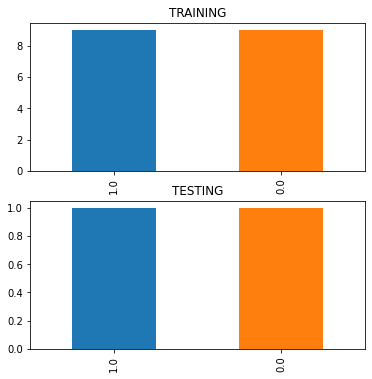

In [55]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [56]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.62320509,  0.0121483 , -0.16403053, -0.81176511, -0.28255581,
        -0.33400387,  0.20788629],
       [-1.30152211, -0.40362575, -0.64204875, -0.77729333, -0.26618302,
        -0.19235818,  0.19484104],
       [-0.01673541, -0.35603035,  0.60750705, -0.93872469, -0.25717058,
        -0.20242766,  0.19828625],
       [-0.35757387, -0.26846778, -0.35490635,  0.90191699,  0.42581999,
         1.0173527 , -0.2993541 ],
       [-1.13284611, -0.40498823, -0.66218911, -0.93310403, -0.25963122,
        -0.19309623,  0.19714224],
       [ 2.07954116,  4.07981457,  3.65515876,  1.64591381,  3.70849885,
         3.10845481, -3.19303385],
       [-1.03794975, -0.34882215, -0.63653434, -0.89588561, -0.2581745 ,
        -0.17295307,  0.19625169],
       [-0.26517543, -0.24435486, -0.57355058,  0.08648748, -0.23869312,
         0.34296644,  0.37981903],
       [-0.69375843, -0.2805375 , -0.17434221, -0.87444781, -0.26536731,
        -0.12467692,  0.20637452],
       [ 0.42109263, -0.2948

In [57]:
#math.sqrt(len(y_test))

1.4142135623730951

In [58]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=2,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [59]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0.])

In [60]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred))
print("recall :" , recall_score(y_test, y_pred))
print("F-Measure :" , f1_score(y_test, y_pred))

[[1 0]
 [1 0]]
Akurasi : 0.5
presisi : 0.0
recall : 0.0
F-Measure : 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
